In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

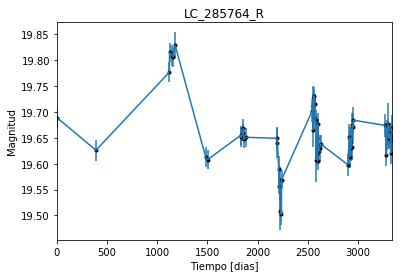

In [2]:
data = np.genfromtxt('LC_285764_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_285764_R')
plt.savefig("LC_285764_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

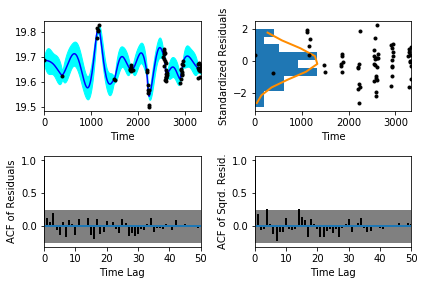

In [5]:
sample.assess_fit()

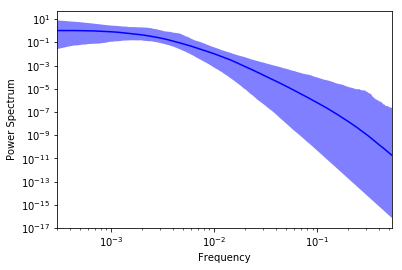

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

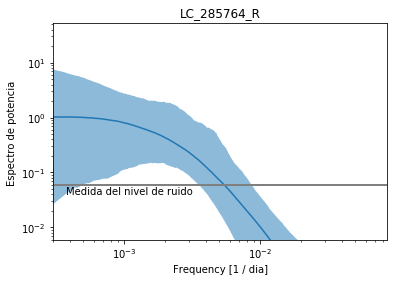

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_R')

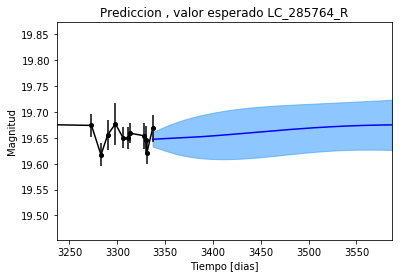

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_R')

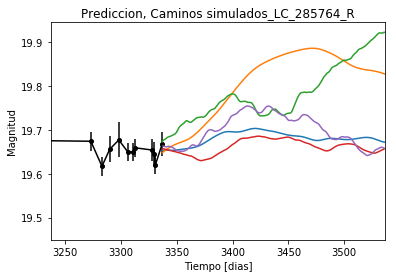

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


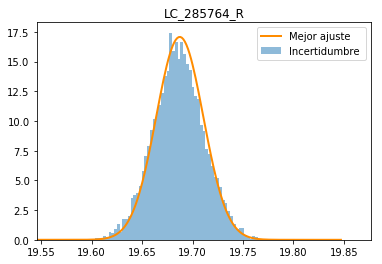

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_R')
plt.savefig("Mejor_ajuste_LC_285764_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

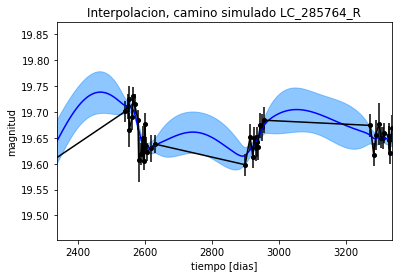

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

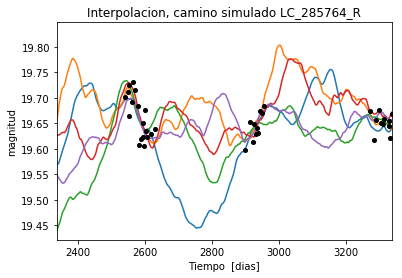

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 667.282320078
Median: 0.0124482251215
Standard deviation: 0.196634419671
68% credibility interval: [ 0.00108094  0.19679382]
95% credibility interval: [  3.81522489e-04   7.84032659e-01]
99% credibility interval: [  3.22101002e-04   9.83506473e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 975.837211705
Median: 0.00358342972837
Standard deviation: 0.0762223675898
68% credibility interval: [ 0.0007226   0.02720114]
95% credibility interval: [ 0.00034837  0.19778328]
99% credibility interval: [  3.07123348e-04   5.87724380e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 358.406483064
Median: 0.0288197739858
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1136.79297251
Median: 151.831031846
Standard deviation: 1.70679199186
68% credibility interval: [ 149.93064443  153.14500121]
95% credibility interval: [ 147.42640836  153.89808567]
99% credibility interval: [ 145.23879909  154.3416348 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 343.226719074
Median: 0.81001199515
Standard deviation: 2.15305329656
68% credibility interval: [ 0.08877247  3.83036284]
95% credibility interval: [ 0.02223047  7.1646637 ]
99% credibility interval: [  0.01372947  10.72099215]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 844.84780854
Median: 0.587025047104
Standard deviation: 8.59762662628
68% credibility interval: [ 0.03415215  7.38712331]
95% credibility interval: [  3.22607604e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1667.18348601
Median: 6.54860788621e-32
Standard deviation: 2.44515047909e+19
68% credibility interval: [  1.06761335e-72   2.86205403e-02]
95% credibility interval: [  3.74969264e-133   4.70990256e+014]
99% credibility interval: [  1.43864991e-142   1.58209259e+019]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3141.48426179
Median: 19.6640880765
Standard deviation: 0.0294666925828
68% credibility interval: [ 19.6396876  19.6893815]
95% credibility interval: [ 19.60721199  19.72483962]
99% credibility interval: [ 19.57358454  19.75412119]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 622.452643432
Median: 0.00641878924381
Standard deviation: 0.24184148166
68% credibility interval: [ 0.          0.32728131]
95% credibility interval: [ 0.          0.88230517]
99% credibility interval: [ 0.          1.02425198]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 622.452643432
Median: 0.00641878924381
Standard deviation: 0.24184148166
68% credibility interval: [ 0.          0.32728131]
95% credibility interval: [ 0.          0.88230517]
99% credibility interval: [ 0.          1.02425198]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 771.27397889
Median: 0.0
Standard deviation: 0.00118196231208
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1136.79297251
Median: 151.831031846
Standard deviation: 1.70679199186
68% credibility interval: [ 149.93064443  153.14500121]
95% credibility interval: [ 147.42640836  153.89808567]
99% credibility interval: [ 145.23879909  154.3416348 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2670.48675833
Median: 0.0055133027439
Standard deviation: 0.00437529921488
68% credibility interval: [ 0.00350559  0.0095276 ]
95% credibility interval: [ 0.00241424  0.01764106]
99% credibility interval: [ 0.00193797  0.02737215]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1535.45293035
Median: 1.0050569339
Standard deviation: 0.159525228887
68% credibility interval: [ 0.86403323  1.17806349]
95% credibility interval: [ 0.75024156  1.36436183]
99% credibility interval: [ 0.69162715  1.50690338]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2759.35492103
Median: 0.000226618434519
Standard deviation: 0.0433721575922
68% credibility interval: [  1.27592204e-06   5.13613320e-03]
95% credibility interval: [  6.57605432e-19   4.15725753e-02]
99% credibility interval: [  1.20458833e-23   1.67619490e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 667.282320078
Median: (-0.0782145051838-0.134818886953j)
Standard deviation: 1.95842357776
68% credibility interval: [-1.23649205-3.25192877j -0.00679174-0.01323463j]
95% credibility interval: [ -4.92622248e+00+0.j          -2.39717650e-03-0.06894682j]
99% credibility interval: [ -6.17955342e+00+0.j          -2.02382028e-03-4.23949087j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 975.837211705
Median: (-0.0225153530186+0.54075403184j)
Standard deviation: 1.59321994732
68% credibility interval: [-0.17090983+0.97144025j -0.00454025+1.95270112j]
95% credibility interval: [-1.24270902+0.j         -0.00218886+1.94371518j]
99% credibility interval: [ -3.69278119e+00+3.06884847j  -1.92971291e-03+0.j        ]
Posterior sum